# Github Repo Classification


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sbn

import sys
import os

os.chdir('/Users/mbornstein/Documents/projects/ml/github_informaticup/GithubRepoClassification')

from metrics.githubMetrics import GithubMetrics, metricCollection
from data.given_repos import given_repos

## Data Aggregation

In [2]:
def get_repo_links(amount=100):
    repo_links = open('data/repoURLs.txt', 'r').readlines()[:amount]
    return [link.strip() for link in repo_links]

def aggregate_data(data_size=100):
    given_repo_links, _ = given_repos
    repo_links = get_repo_links(data_size) + given_repo_links
    metric_list = list(metricCollection.keys())

    data = []
    for link in repo_links:
        github_metrics = GithubMetrics(link)
        data.append([link] + [github_metrics.get(m) for m in metric_list])

    return pd.DataFrame(data=data, columns=['repo'] + metric_list)

In [3]:
data = aggregate_data(data_size=0)
data

,repo,up_to_dateness,avg_entropy,watcher_count,file_count,repo_size,avg_folder_depth,file_folder_ratio,open_issues,forks_count
0,https://github.com/briantemple/homeworkr,1.523894e+08,0.577257,6,13,226,2.250000,1.181818,0,2
1,https://github.com/spring-projects/spring-boot,1.341221e+05,0.611164,8799,4207,58636,8.052261,1.460764,610,8450
2,https://github.com/facebook/react,1.475649e+04,0.651290,55151,1031,148555,3.211864,5.572973,632,9893
3,https://github.com/nodegit/nodegit,2.631216e+05,0.629062,2294,3365,29623,4.715686,8.785901,148,355
4,https://github.com/scipy/scipy,1.094576e+05,0.560380,2734,2330,80585,4.697802,9.357430,933,1579
5,https://github.com/spez/RottenTomatoes,7.844799e+07,0.627325,0,155,2064,2.807692,3.369565,1,0
6,https://github.com/m2mtech/calculator-2015,1.446084e+07,0.639129,71,47,518,2.666667,1.678571,1,25
7,https://github.com/bcaffo/751and2,3.164825e+07,0.783652,7,199,16773,2.200000,5.236842,2,24
8,https://github.com/HPI-SWA-Teaching/SWT16-Proj...,4.197653e+06,0.539460,0,519,328,3.703704,5.703297,0,5
9,https://github.com/uwhpsc-2016/example-python-...,2.055439e+07,0.750012,0,62,7,2.909091,1.215686,4,7


## Visualizations

we want to compare stuff

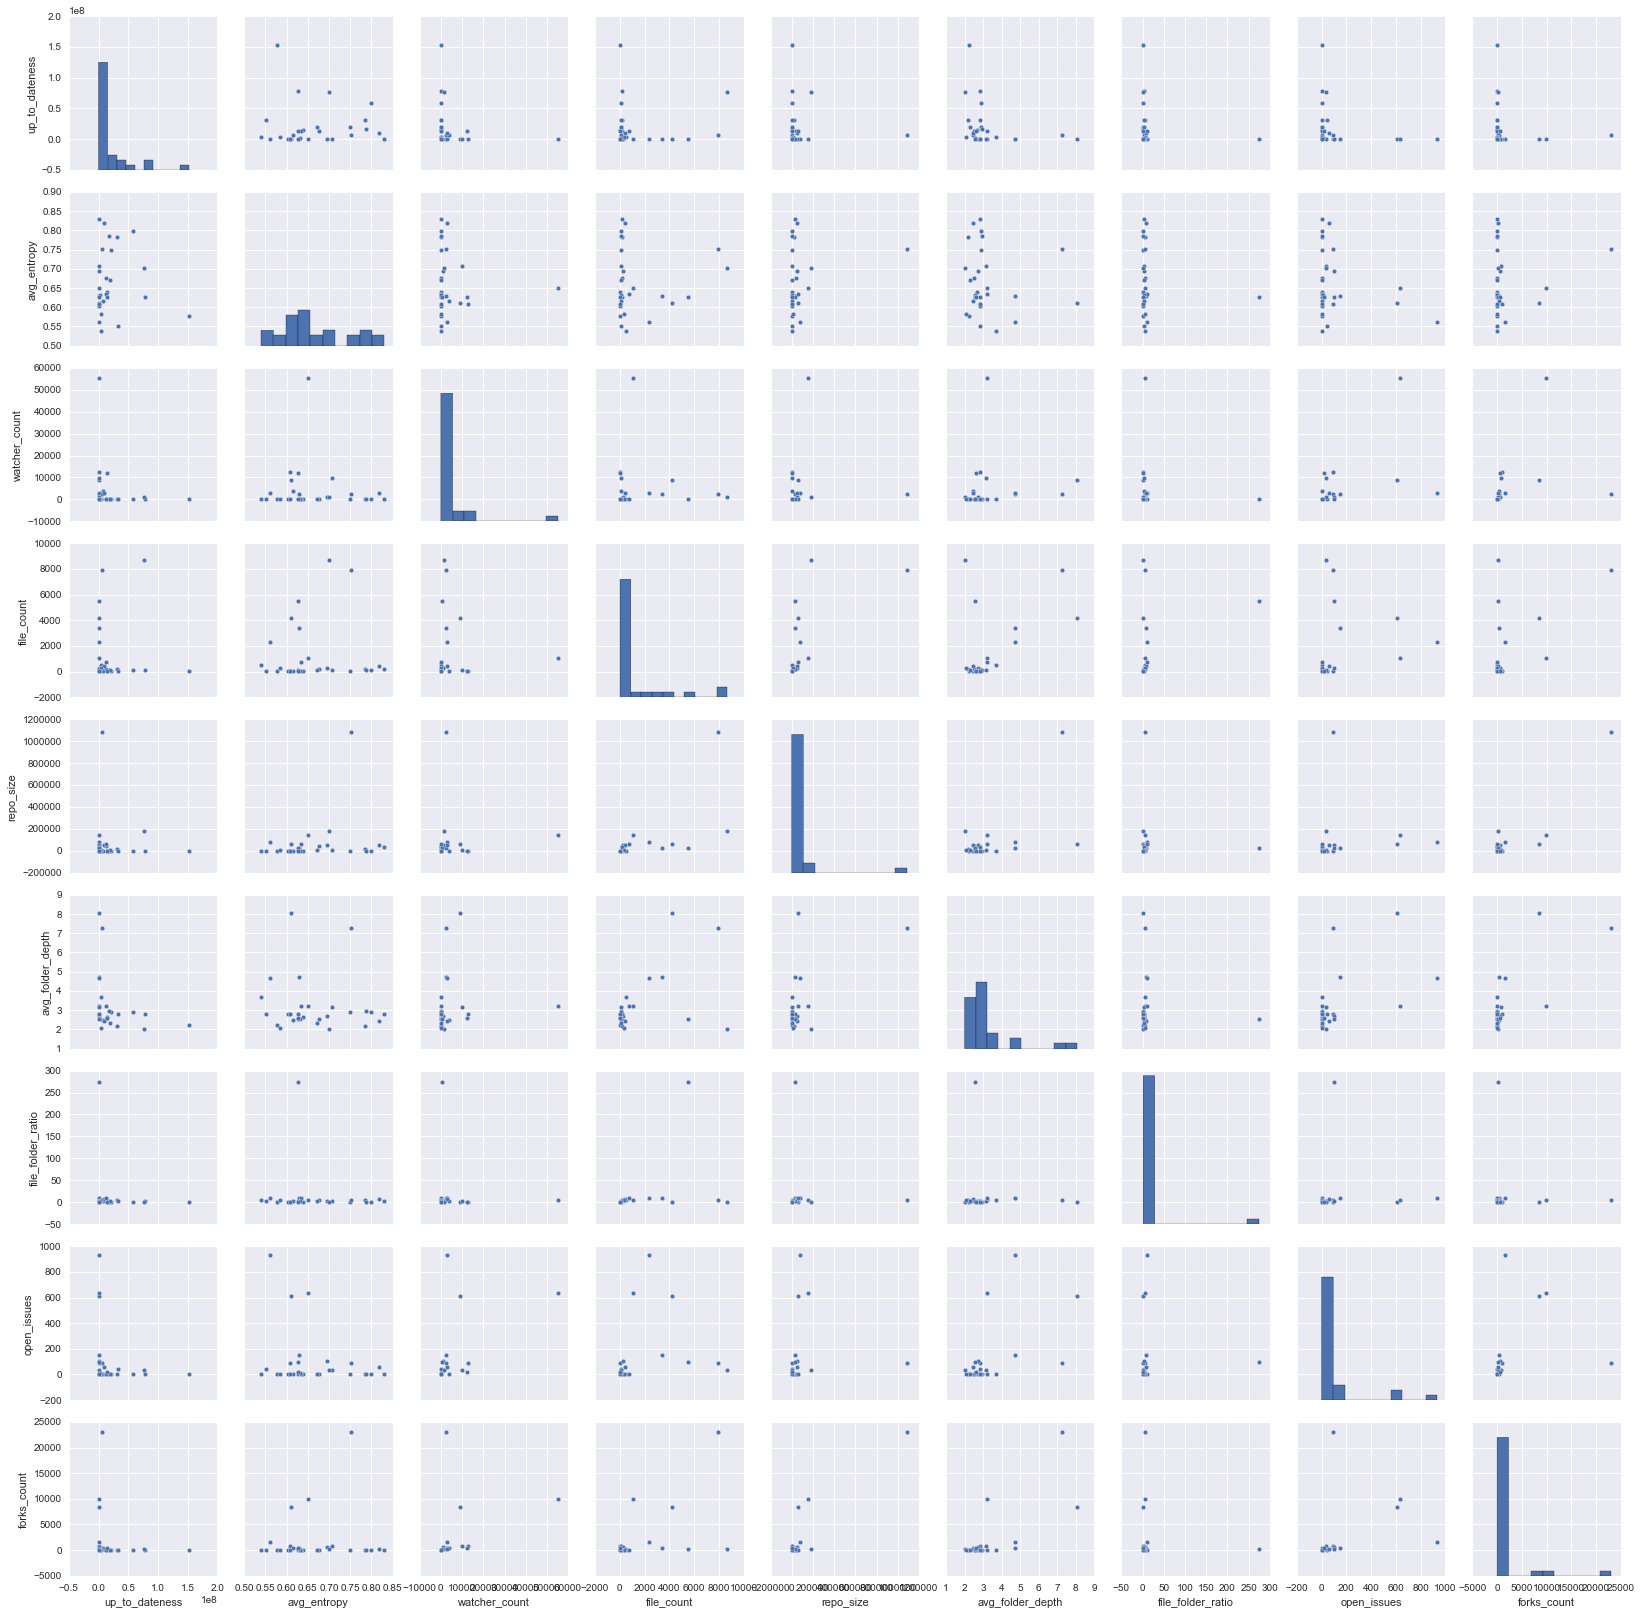

In [4]:
sbn.pairplot(data)

In [5]:
#norm_data = data
metric_list = list(metricCollection.keys())
for metric in metric_list:
    print(data[metric].describe())

count    3.000000e+01
mean     1.926959e+07
std      3.308695e+07
min      1.475649e+04
25%      2.855857e+05
50%      6.584140e+06
75%      1.903309e+07
max      1.523894e+08
Name: up_to_dateness, dtype: float64
count    30.000000
mean      0.663125
std       0.081957
min       0.539460
25%       0.609522
50%       0.633023
75%       0.705391
max       0.830095
Name: avg_entropy, dtype: float64
count       30.000000
mean      3861.866667
std      10369.924659
min          0.000000
25%          8.000000
50%        104.500000
75%       2636.000000
max      55151.000000
Name: watcher_count, dtype: float64
count      30.000000
mean     1229.233333
std      2349.450056
min        13.000000
25%        53.750000
50%       167.500000
75%       694.500000
max      8683.000000
Name: file_count, dtype: float64
count    3.000000e+01
mean     6.333160e+04
std      1.977090e+05
min      7.000000e+00
25%      6.480000e+02
50%      4.523000e+03
75%      4.899125e+04
max      1.083379e+06
Name: repo_s

In [20]:
data.columns

Index(['repo', 'up_to_dateness', 'avg_entropy', 'watcher_count', 'file_count',
       'repo_size', 'avg_folder_depth', 'file_folder_ratio', 'open_issues',
       'forks_count'],
      dtype='object')

In [17]:
# normalize distribution
norm_data = pd.DataFrame({
        'avg_entropy': data['avg_entropy']
})
for metric in metric_list[1:]:
    norm_data[metric] = np.log(data[metric] + 1)
    norm_data[metric] = (norm_data[metric] - norm_data[metric].min()) / (norm_data[metric].max() - norm_data[metric].min())
norm_data

,avg_entropy,watcher_count,file_count,repo_size,avg_folder_depth,file_folder_ratio,open_issues,forks_count
0,0.140256,0.178232,0.000000,0.283130,0.072077,0.003404,0.000000,0.109336
1,0.263249,0.831895,0.887329,0.753179,1.000000,0.028190,0.937951,0.899879
2,0.405497,1.000000,0.668752,0.831851,0.306920,0.230597,0.943123,0.915568
3,0.327129,0.708792,0.852608,0.695395,0.583487,0.312586,0.731627,0.584683
4,0.078049,0.724858,0.795467,0.780088,0.580648,0.324280,1.000000,0.732995
5,0.320962,0.000000,0.374919,0.469987,0.215536,0.146481,0.101345,0.000000
6,0.362752,0.391713,0.191619,0.353115,0.181348,0.045662,0.101345,0.324251
7,0.851362,0.190463,0.413559,0.647262,0.058032,0.219783,0.160628,0.320348
8,0.000000,0.000000,0.562157,0.314537,0.406968,0.234642,0.000000,0.178319
9,0.741261,0.000000,0.233909,0.000000,0.239343,0.006577,0.235316,0.206949


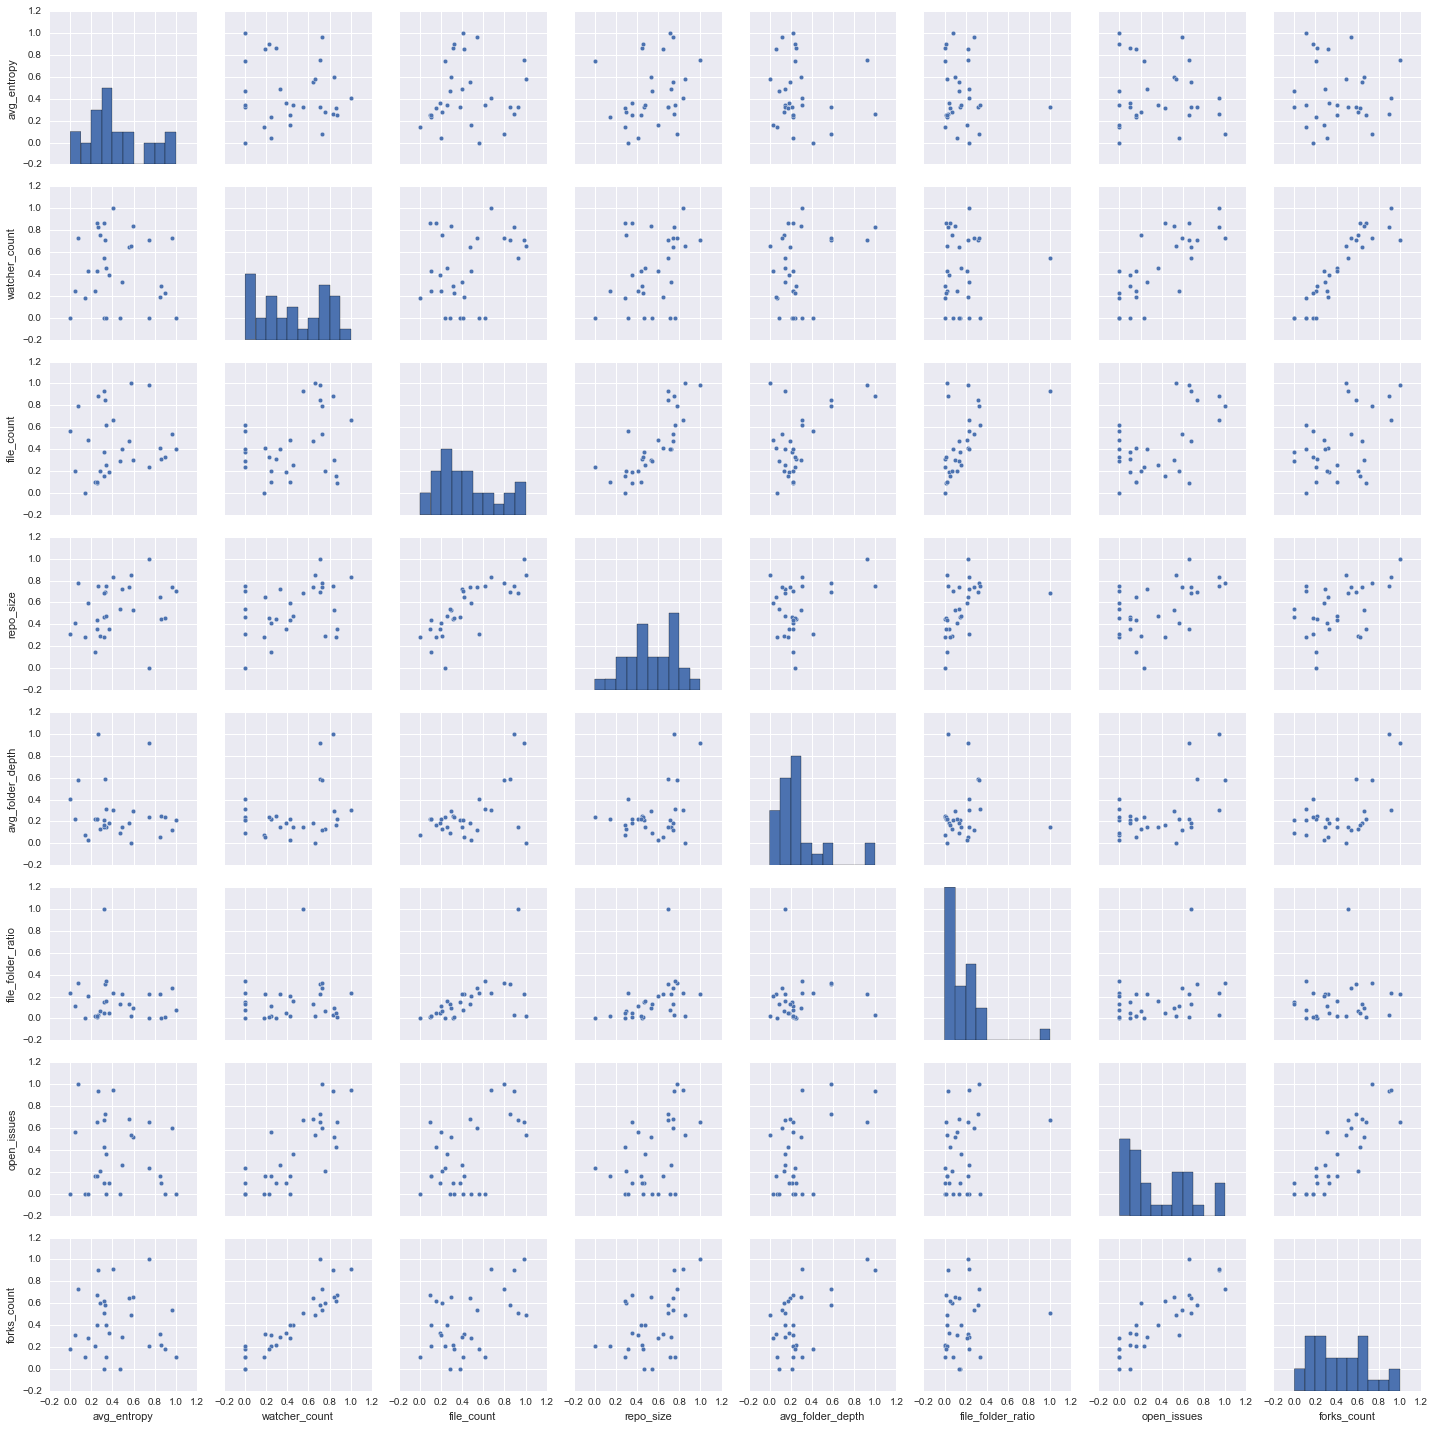

In [18]:
sbn.pairplot(norm_data)

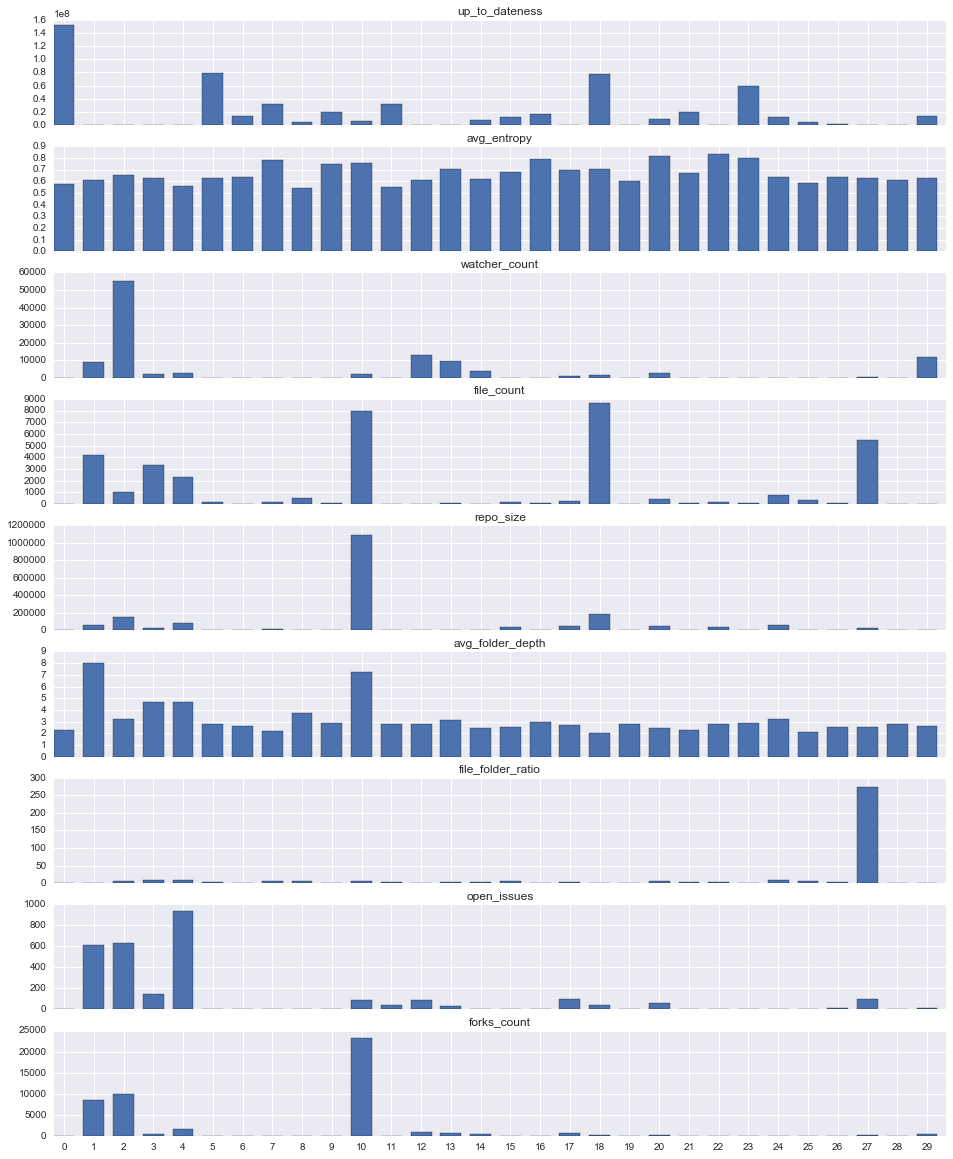

In [8]:
#fig = plt.figure(figsize=(16,8))
f, axarr = plt.subplots(len(metricCollection), sharex=True, figsize=(16,20))

index = np.arange(len(data))
for i, metric in enumerate(metricCollection):
    ax = axarr[i]
    ax.bar(index,
        data[metric],
        0.7, # barwdith
        label=metric
    )
    ax.set_title(metric)

plt.xticks(index + 0.35, index)
None

## TSNE

In [9]:
import sklearn
import sklearn.manifold

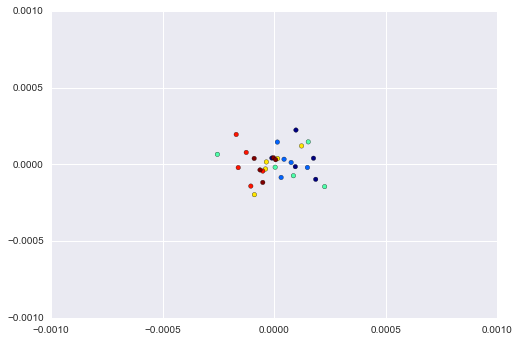

In [19]:
#X = data[['repo_size', 'open_issues', 'forks_count', 'up_to_dateness', 'file_count', 'watcher_count']]
X = norm_data
model = sklearn.manifold.TSNE(n_components=2, random_state=0)
#np.set_printoptions(suppress=True)
vis_data = model.fit_transform(X)

# plot the result
vis_x = vis_data[:, 0]
vis_y = vis_data[:, 1]

plt.scatter(vis_x, vis_y, c=[[0]*5, [1]*5, [2]*5, [3]*5, [4]*5, [5]*5], cmap=plt.cm.get_cmap("jet", 10))
#plt.clim(-0.5, 9.5)
plt.xlim(-0.001, 0.001)
plt.ylim(-0.001, 0.001)
None

In [11]:
t = np.ones((5, 6)) * np.arange(6)
t = t.flatten()
u = np.unique(t)
pos = np.argwhere(t == u[0]).transpose()[0]
t[pos]

array([ 0.,  0.,  0.,  0.,  0.])